# In this Script
1. Convert Subject Data to Graph Layout
2. Define Variables
3. Assign Variables to Subject Data
4. Save Results


In [35]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from pathlib import Path


# Loading the data 
The GraphCoordinates csv was created using Kayas scripts 02 and 03.

In [36]:
# path to the input data
input_path = '/Users/lunameidoering/Uni/THESIS/feelSpacedata/GraphMaking/RawData'
# path to the recources needed
rec_path = '/Users/lunameidoering/Uni/THESIS/feelSpacedata/GraphMaking/Recources_Meli'
# path to save outputs to
output_path = '/Users/lunameidoering/Uni/THESIS/feelSpacedata/GraphMaking/Output'


In [37]:
'''
NOT NEEDED ONCE CSVS ARE AVAILABLE

# path to databank where you want to save graph
db_path = Path('/Users/lunameidoering/Uni/THESIS/feelSpacedata/GraphMaking/Recources_Meli/Data/database.db')
# connect to database
connection=sqlite3.connect(db_path)
cr=connection.cursor()

# reading all table names
table_list = [a for a in cr.execute("SELECT name FROM sqlite_master WHERE type = 'table'")]
#store graph_coordinates in dataframe
graph_coordinates_df = pd.read_sql_query("SELECT * FROM graph_coordinates", connection)
node_neighbours_df = pd.read_sql_query("SELECT * FROM node_neighbours", connection)

#close the connection
connection.close()

# save them for later use
graph_coordinates_df.to_csv(Path(rec_path + "/Graph_Coordinates.csv"), sep=",") 
node_neighbours_df.to_csv(Path(rec_path + '/Node_Neighbours.csv'), sep=",") 

'''

'\nNOT NEEDED ONCE CSVS ARE AVAILABLE\n\n# path to databank where you want to save graph\ndb_path = Path(\'/Users/lunameidoering/Uni/THESIS/feelSpacedata/GraphMaking/Recources_Meli/Data/database.db\')\n# connect to database\nconnection=sqlite3.connect(db_path)\ncr=connection.cursor()\n\n# reading all table names\ntable_list = [a for a in cr.execute("SELECT name FROM sqlite_master WHERE type = \'table\'")]\n#store graph_coordinates in dataframe\ngraph_coordinates_df = pd.read_sql_query("SELECT * FROM graph_coordinates", connection)\nnode_neighbours_df = pd.read_sql_query("SELECT * FROM node_neighbours", connection)\n\n#close the connection\nconnection.close()\n\n# save them for later use\ngraph_coordinates_df.to_csv(Path(rec_path + "/Graph_Coordinates.csv"), sep=",") \nnode_neighbours_df.to_csv(Path(rec_path + \'/Node_Neighbours.csv\'), sep=",") \n\n'

In [38]:
# load graph data
graph_df = pd.read_csv(rec_path +'/GraphCoordinates.csv')

node_neighbours_df = pd.read_csv(rec_path +'/Node_Neighbours.csv')


#optional: load large original dataset for nicer map (takes approx 2,5 min)
coordinates_old = pd.read_csv(rec_path + '/coordinates_old.csv')


#load participant data
subject_df_raw = pd.read_csv(input_path + '/Pilot3/Behavior_new_fccb0365-73b1-4b52-a5fa-7b40ab902fac.csv')
subject_id = '3' 

#subject_df_raw = pd.read_csv(input_path + '/Pilot4/Behavior_new_1fbb597a-7d3a-4167-a6e7-4ce15614ca3c.csv')
#subject_id = '4'

In [39]:
#function from 07_Assign_Nodes to convert the coordinates to fit the scale of the graph_df data
from typing import List, Tuple, Union
xMin, xMax, zMin, zMax = -442.87, 439.76, -280.14, 301.68

def convert_coordinate(coordinate:Union[Tuple[float,float], List[float]], meters:int)->Tuple[float, float]:
    """convert coordinates to a more precise pixel value

    Args:
        coordinate (float): pair of x and y coordinates to be converted
        meters (int): size of the pixel value of the graph

    Returns:
        tuple: pair of converted x and y coordinates (float)
    """
    step = meters
    x = (np.abs(xMin) + coordinate[0]) / step
    y = (np.abs(zMin) + coordinate[1]) / step
    return x, y

# Preparing the Data


In [40]:
graph_df.drop(columns=graph_df.columns[:3], axis=1,  inplace=True)

# give edges numbers
graph_df['edgeNr'] = graph_df.groupby(['edgeStart', 'edgeEnd']).ngroup()
graph_df.insert(5, 'edgeNr', graph_df.pop('edgeNr'))


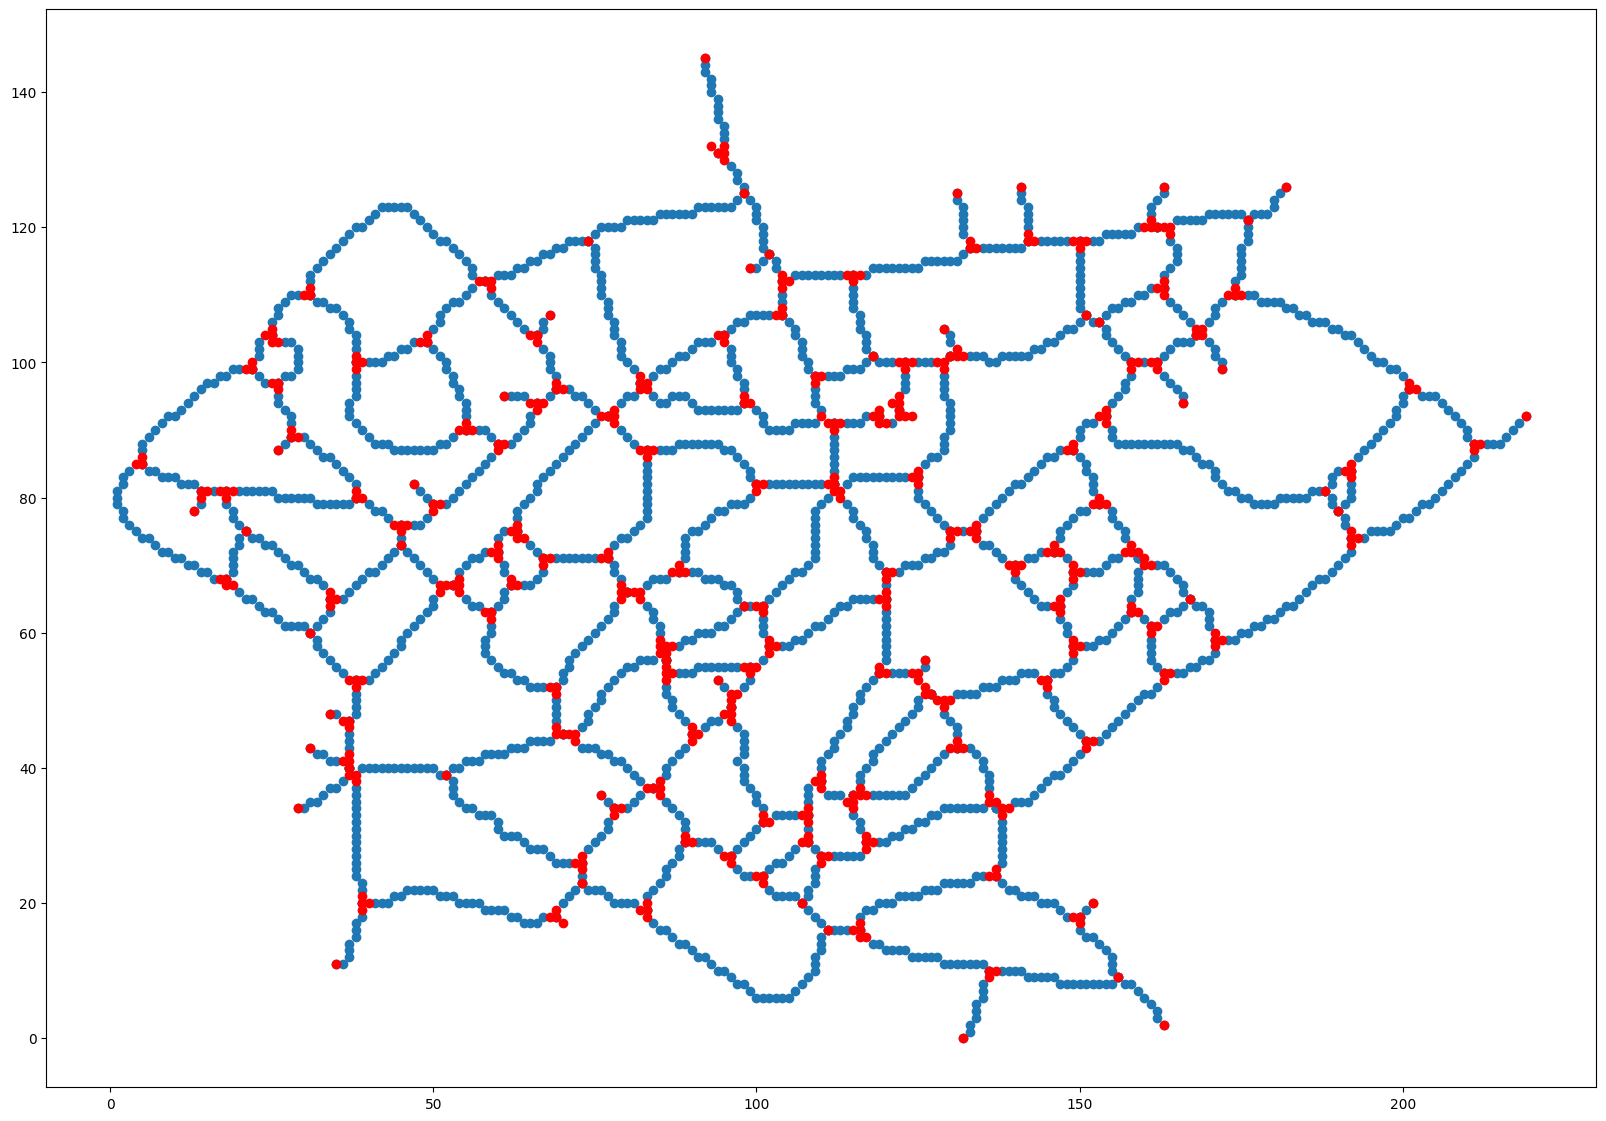

In [41]:
#get nodes
node_df = graph_df[graph_df['graph_element_type']=='Node']

# get edges
edge_df = graph_df[graph_df['graph_element_type']=='Edge']

#vizualize
fig = plt.figure(figsize=(20,14))
plt.scatter(edge_df['X_Coor'],edge_df['Z_Coor'])
plt.scatter(node_df['X_Coor'],node_df['Z_Coor'], c = 'red')
plt.show()



In [42]:
# only if coordinates_old is imported
"""
#reduce rate
coordinates_old = coordinates_old[coordinates_old.index % 100 == 0] 
#convert coordinates
converted_coor_old = coordinates_old.apply(lambda row: convert_coordinate([row['x'],row['z']],4), axis=1)
converted_coor_old_df=pd.DataFrame(converted_coor_old.tolist())
converted_coor_old_df.columns=['x_conv','z_conv']

coordinates_old['x_conv']=converted_coor_old_df['x_conv'].values
coordinates_old['z_conv']=converted_coor_old_df['z_conv'].values

#density plot of location of participants
fig = plt.figure(figsize=(20,14))
plt.scatter(coordinates_old['x_conv'],coordinates_old['z_conv'], s = 0.1, alpha=1, c = 'skyblue')

plt.title('Participants Trajectories Form a Map Layout', fontsize = 20)
plt.show()

""" 




Index(['Unnamed: 0', 'gazeValidityCLR.Combined', 'gazeValidityCLR.LeftEye',
       'gazeValidityCLR.RightEye', 'eyeOpennessLR.LeftEye',
       'eyeOpennessLR.RightEye', 'LeftEye_mm', 'RightEye_mm',
       'timeStampGetVerboseData', 'eyePositionCombinedWorld.x',
       'eyePositionCombinedWorld.y', 'eyePositionCombinedWorld.z',
       'eyeDirectionCombinedWorld.x', 'eyeDirectionCombinedWorld.y',
       'eyeDirectionCombinedWorld.z', 'eyeDirectionCombinedLocal.x',
       'eyeDirectionCombinedLocal.y', 'eyeDirectionCombinedLocal.z',
       'eyeDirectionLeftWorld.x', 'eyeDirectionLeftWorld.y',
       'eyeDirectionLeftWorld.z', 'eyeDirectionRightWorld.x',
       'eyeDirectionRightWorld.y', 'eyeDirectionRightWorld.z', 'hmdPosition.x',
       'hmdPosition.y', 'hmdPosition.z', 'hmdDirectionForward.x',
       'hmdDirectionForward.y', 'hmdDirectionForward.z', 'hmdDirectionUp.x',
       'hmdDirectionUp.y', 'hmdDirectionUp.z', 'hmdDirectionRight.x',
       'hmdDirectionRight.y', 'hmdDirectionRight

In [43]:
node_df = node_df.drop(['graph_element_type','edgeNr', 'edgeStart','edgeEnd','X_Coor','Z_Coor'], axis=1)
#only one entry per node nr
node_df = node_df.drop_duplicates(subset=['nodeCentroid_x', 'nodeCentroid_z'], keep='first')

#calculate node range (centroid +/- radius)
node_df['min_x']=node_df['nodeCentroid_x']-node_df['nodeRadius']
node_df['min_z']=node_df['nodeCentroid_z']-node_df['nodeRadius']
node_df['max_x']=node_df['nodeCentroid_x']+node_df['nodeRadius']
node_df['max_z']=node_df['nodeCentroid_z']+node_df['nodeRadius']

#nodeNr to int
node_df['nodeNr'] = node_df['nodeNr'].astype(int)






# adding neighboring nodes

In [44]:
# get node neighbours
node_neighbours_dict = {}

#combine the two lists
for index, row in node_neighbours_df.iterrows():
    first_node = row['FirstNode']
    second_node = row['SecondNode']

    # Adding the second_node to the neighbours list of first_node
    if first_node in node_neighbours_dict:
        node_neighbours_dict[first_node].append(second_node)
    else:
        node_neighbours_dict[first_node] = [second_node]

    # Adding the first_node to the neighbours list of second_node
    if second_node in node_neighbours_dict:
        node_neighbours_dict[second_node].append(first_node)
    else:
        node_neighbours_dict[second_node] = [first_node]

#get neighbours of input node
def findNodeNeighbours(node):
    return node_neighbours_dict.get(node, [])

# Adding new column to node_df
node_df['neighbours'] = node_df['nodeNr'].apply(findNodeNeighbours)

# get the number of neighbours
node_df['num_neighbours'] = node_df.neighbours.apply(lambda x: len(x))

filepath = Path(output_path + '/Node_Info.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
node_df.to_csv(filepath, sep=";", index = False) 

display(node_df)


,nodeNr,nodeCentroid_x,nodeCentroid_z,nodeRadius,min_x,min_z,max_x,max_z,neighbours,num_neighbours
0,0,5.0,85.0,4.5,0.5,80.5,9.5,89.5,"[3, 2, 6]",3
3,1,13.0,78.0,2.0,11.0,76.0,15.0,80.0,[2],1
4,2,14.0,81.0,3.5,10.5,77.5,17.5,84.5,"[0, 1, 4]",3
7,3,18.0,68.0,3.5,14.5,64.5,21.5,71.5,"[0, 5, 14]",3
11,4,18.0,81.0,4.0,14.0,77.0,22.0,85.0,"[2, 5, 21]",3
...,...,...,...,...,...,...,...,...,...,...
495,154,192.0,84.0,3.0,189.0,81.0,195.0,87.0,"[152, 153, 156]",3
499,155,192.0,74.0,6.0,186.0,68.0,198.0,80.0,"[147, 153, 157]",3
503,156,201.0,96.0,4.0,197.0,92.0,205.0,100.0,"[149, 154, 157]",3
506,157,211.0,88.0,5.0,206.0,83.0,216.0,93.0,"[155, 156, 158]",3


In [45]:
# save table as latex
latex = node_df.copy()
with open(output_path + '/nodes_table.tex', "w") as f:
    f.write(latex.style.format(precision=2).hide(axis="index").to_latex())

In [46]:
#prepare subject data
subject_df_raw = subject_df_raw[['Unnamed: 0', 'hmdPosition.x','hmdPosition.z']]
subject_df = subject_df_raw.rename(columns={'Unnamed: 0': 'timestamp','hmdPosition.x': 'x_pos', 'hmdPosition.z': 'z_pos'})

In [47]:

#round datapoints to reduce rate
subject_df['x_pos'] = round(subject_df['x_pos'],2)
subject_df['z_pos'] = round(subject_df['z_pos'],2)

#remove duplicates
subject_df = subject_df.drop_duplicates(subset=['x_pos', 'z_pos'], keep='last')

#remove Nan
subject_df=subject_df.dropna()
print(f'The DataFrame now has {len(subject_df)} rows.')

#reduce rate (keep only every 10th point)
subject_df = subject_df[subject_df.index % 10 == 0] 
#print(f'The DataFrame now has {len(subject_df)} rows.')

#convert coordinates to fit the scale of the node_df data (see Melissa Sarrias thesis)
converted_coor = subject_df.apply(lambda row: convert_coordinate([row['x_pos'],row['z_pos']],4), axis=1)
converted_coor_df=pd.DataFrame(converted_coor.tolist())
converted_coor_df.columns=['x_conv','z_conv']

subject_df[['x_conv', 'z_conv']] = converted_coor_df[['x_conv', 'z_conv']].values


The DataFrame now has 131534 rows.


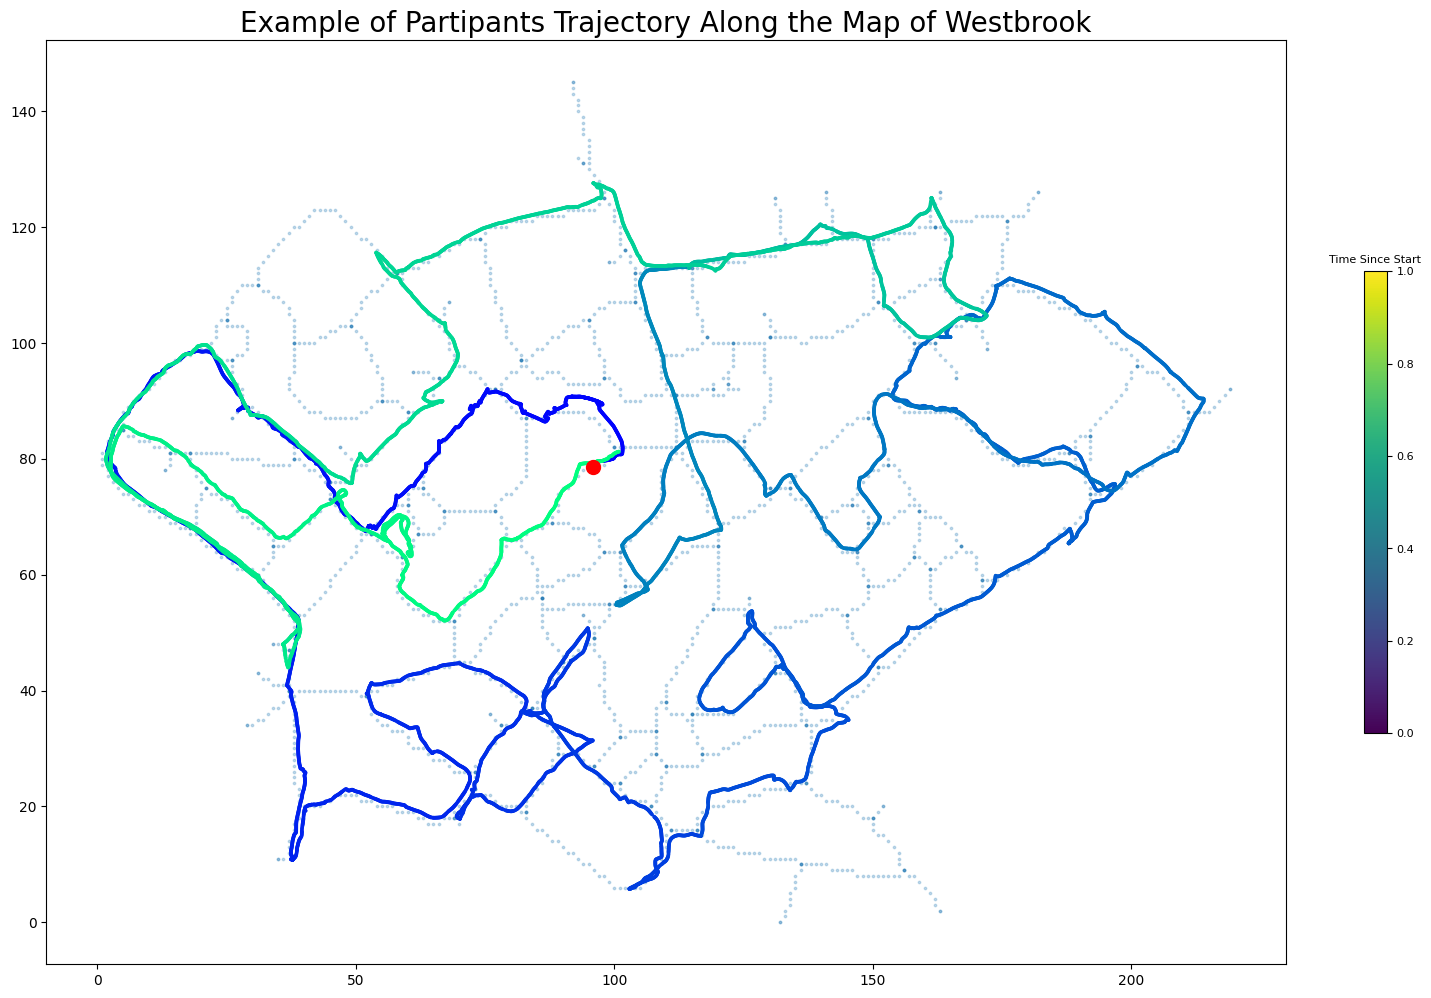

In [48]:
#show subjects trajectory
fig = plt.figure(figsize=(20,12))

#coor_old
#plt.scatter(coordinates_old['x_conv'],coordinates_old['z_conv'], s = 1, alpha=0.05, c = 'skyblue')

# Melissas data
plt.scatter(graph_df['X_Coor'],graph_df['Z_Coor'], s = 3, alpha = 0.25)
# my dataset
plt.scatter(subject_df['x_conv'],subject_df['z_conv'], s = 3, c = subject_df['timestamp'], cmap = 'winter')

first_coordinate = subject_df.iloc[0]
plt.scatter(first_coordinate['x_conv'], first_coordinate['z_conv'], color='red', s=100, label='First Coordinate')

clb=plt.colorbar(shrink=0.5)
clb.ax.tick_params(labelsize=8) 
clb.ax.set_title('Time Since Start',fontsize=8)

plt.title('Example of Partipants Trajectory Along the Map of Westbrook', fontsize = 20)
plt.show()
#save fig
fig.savefig(output_path + '/plots/trajectory_sub%s.png' % subject_id)

# Method 1: Assign Nodes

In [49]:
#returns the node belonging to the given coordinate
def findNodeNr(x,z):
    #list for node info to go in
    nodes = []
    #search in every row from node_df
    for i in range(len(node_df)):
        # append nodeNr to the list if coordinate in node range 
        if x > node_df['min_x'].iloc[i] and x <  node_df['max_x'].iloc[i] \
            and z > node_df['min_z'].iloc[i] and z < node_df['max_z'].iloc[i]:
            nodes.append(node_df['nodeNr'].iloc[i])
    
    if not nodes:
        return np.nan
    else:
        return nodes[0] #TODO assign node where centroid is closest
    
#applies above function to each row in df and adds the return value to new column
subject_df['nodeNr'] = subject_df.apply(lambda row: findNodeNr(row['x_conv'],row['z_conv']), axis=1) # TODO make this more efficient?

subject_df['in_nodeRadius'] = subject_df['nodeNr'].notna().astype(int)

In [50]:
# add node neighbours
subject_df = pd.merge(subject_df, node_df[['nodeNr', 'neighbours', 'num_neighbours']], on='nodeNr', how='left')

display(subject_df)

,timestamp,x_pos,z_pos,x_conv,z_conv,nodeNr,in_nodeRadius,neighbours,num_neighbours
0,2.432,-59.05,34.53,95.9550,78.6675,NaN,0,NaN,NaN
1,4.209,-59.06,34.55,95.9525,78.6725,NaN,0,NaN,NaN
2,9.253,-59.17,34.56,95.9250,78.6750,NaN,0,NaN,NaN
3,11.772,-59.14,34.64,95.9325,78.6950,NaN,0,NaN,NaN
4,11.883,-59.13,34.65,95.9350,78.6975,NaN,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
13145,2362.708,-41.44,44.21,100.3575,81.0875,76.0,1,"[56, 60, 90]",3.0
13146,2362.819,-40.94,44.42,100.4825,81.1400,76.0,1,"[56, 60, 90]",3.0
13147,2362.930,-40.43,44.59,100.6100,81.1825,76.0,1,"[56, 60, 90]",3.0
13148,2363.041,-39.91,44.72,100.7400,81.2150,76.0,1,"[56, 60, 90]",3.0


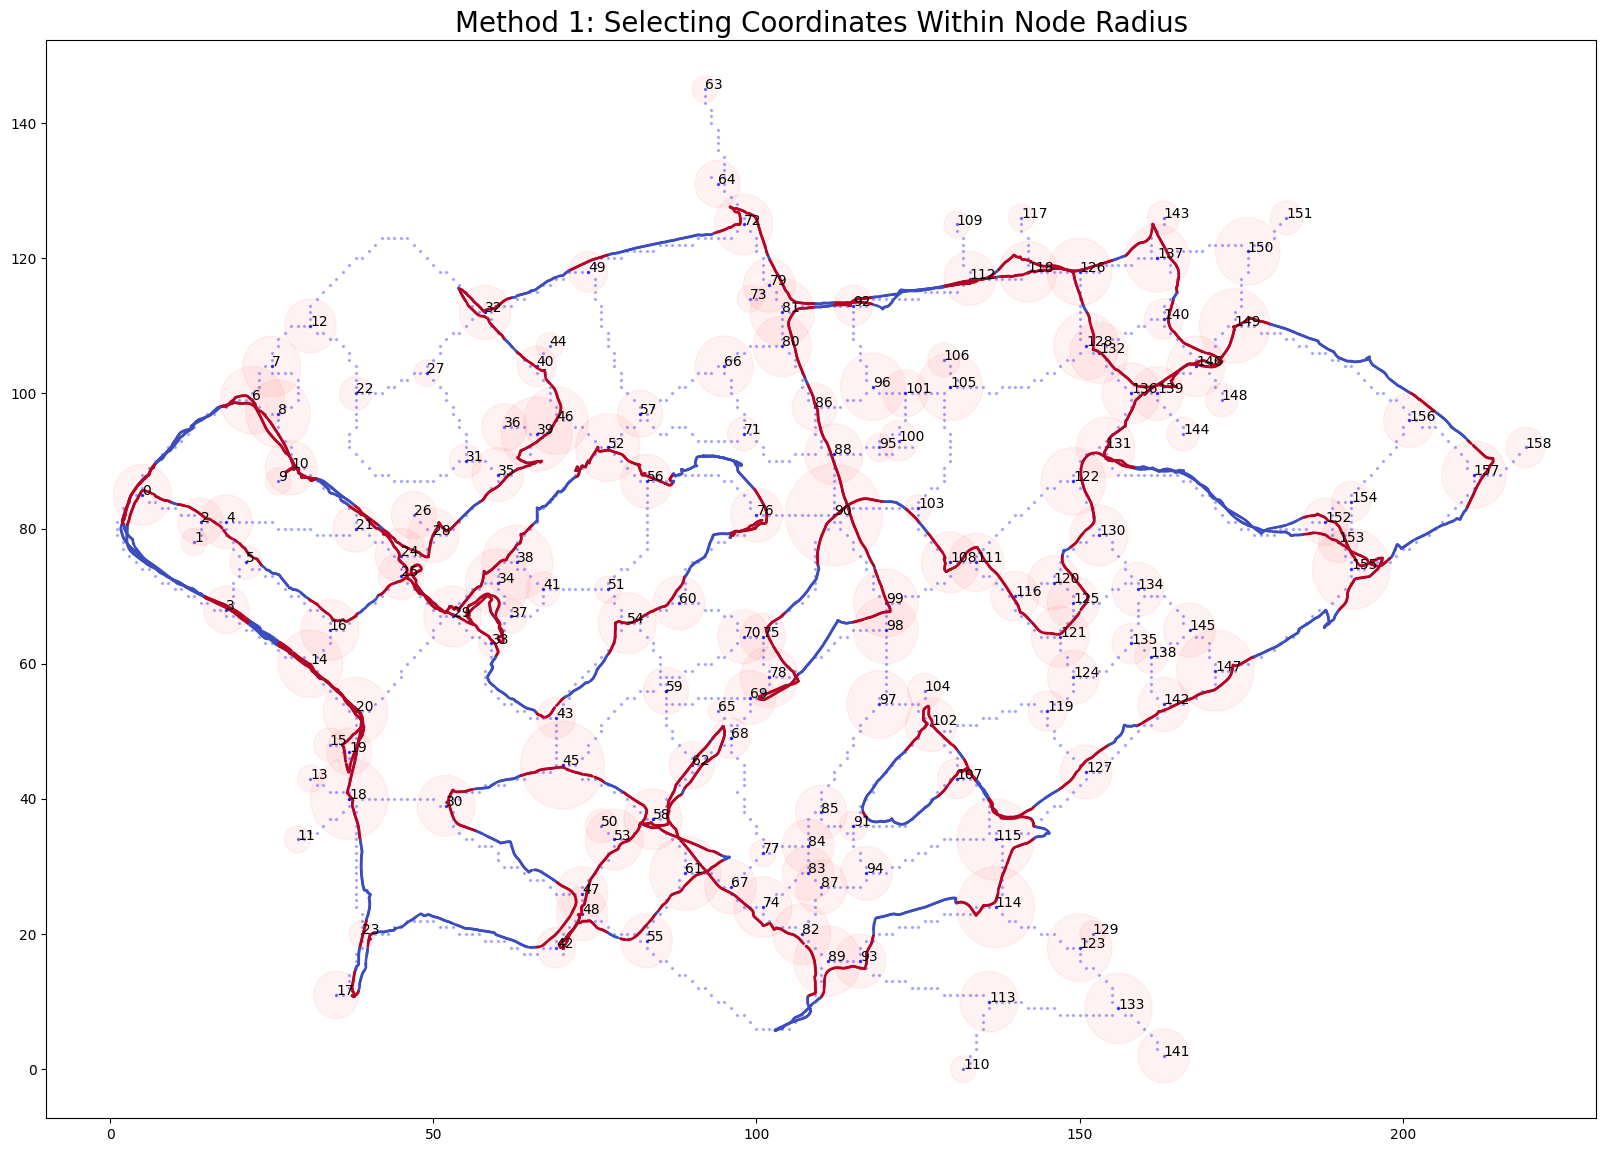

In [51]:
# evaluate results

fig = plt.figure(figsize=(20,14))

# draw node radii and nr
for index, row in node_df.iterrows():
    radius = row['nodeRadius']
    x = row['nodeCentroid_x']
    z = row['nodeCentroid_z']
    node = row['nodeNr']
    plt.text(x , z, str(node), fontsize=10)
    c = plt.Circle(( x , z ),radius,color = 'red', alpha = 0.05)
    plt.gca().add_artist(c)
    #plt.plot(x, z, 'r.')

#coor_old
#plt.scatter(coordinates_old['x_conv'],coordinates_old['z_conv'], s = 0.2, alpha = 0.05, c = 'skyblue')
# Melissas data
plt.scatter(graph_df['X_Coor'],graph_df['Z_Coor'], s = 2, alpha = 0.25, c = 'blue')
# my dataset
plt.scatter(subject_df['x_conv'],subject_df['z_conv'], s=1, c = subject_df['in_nodeRadius'], cmap="coolwarm")

plt.title('Method 1: Selecting Coordinates Within Node Radius', fontsize = 20)
plt.show()
fig.savefig(output_path + '/plots/method1_sub%s.png' % subject_id)

# Method 2: Reduce Datapoints classified as Decision Points

In [52]:
from scipy.spatial.distance import cdist

def find_closest_coordinate(df_group, node_center):
    distances = cdist(df_group[['x_conv', 'z_conv']], [node_center])
    closest_index = np.argmin(distances)
    return df_group.iloc[closest_index]['timestamp']

#only interested in the node positions
final_df=subject_df.dropna(subset=['nodeNr'])

# identify center coordinates for each node
node_centers = node_df.groupby('nodeNr')[['nodeCentroid_x', 'nodeCentroid_z']].mean()

# Initialize closest_to_nodeCentroid column with 0
subject_df['closest_to_nodeCentroid'] = 0


# iterate through unique node numbers in subject data
for nodeNr, group in final_df.groupby('nodeNr'):
    # find closest coordinate to the node's center
    closest_coordinate = node_centers.loc[nodeNr]
    closest_timestamp = find_closest_coordinate(group, closest_coordinate)

    # Mark the selected row in subject_df with closest_to_nodeCentroid = 1
    subject_df.loc[subject_df['timestamp'] == closest_timestamp, 'closest_to_nodeCentroid'] = 1

    # delete rows with later timestamps
    condition = (final_df['nodeNr'] == nodeNr) & (final_df['timestamp'] > closest_timestamp)
    final_df = final_df[~condition]



#apply te filtering to the whole dataframe as a bool
subject_df['node_1st_half'] = subject_df['timestamp'].isin(final_df['timestamp'])
subject_df['node_1st_half'] = subject_df['node_1st_half'].astype(int)


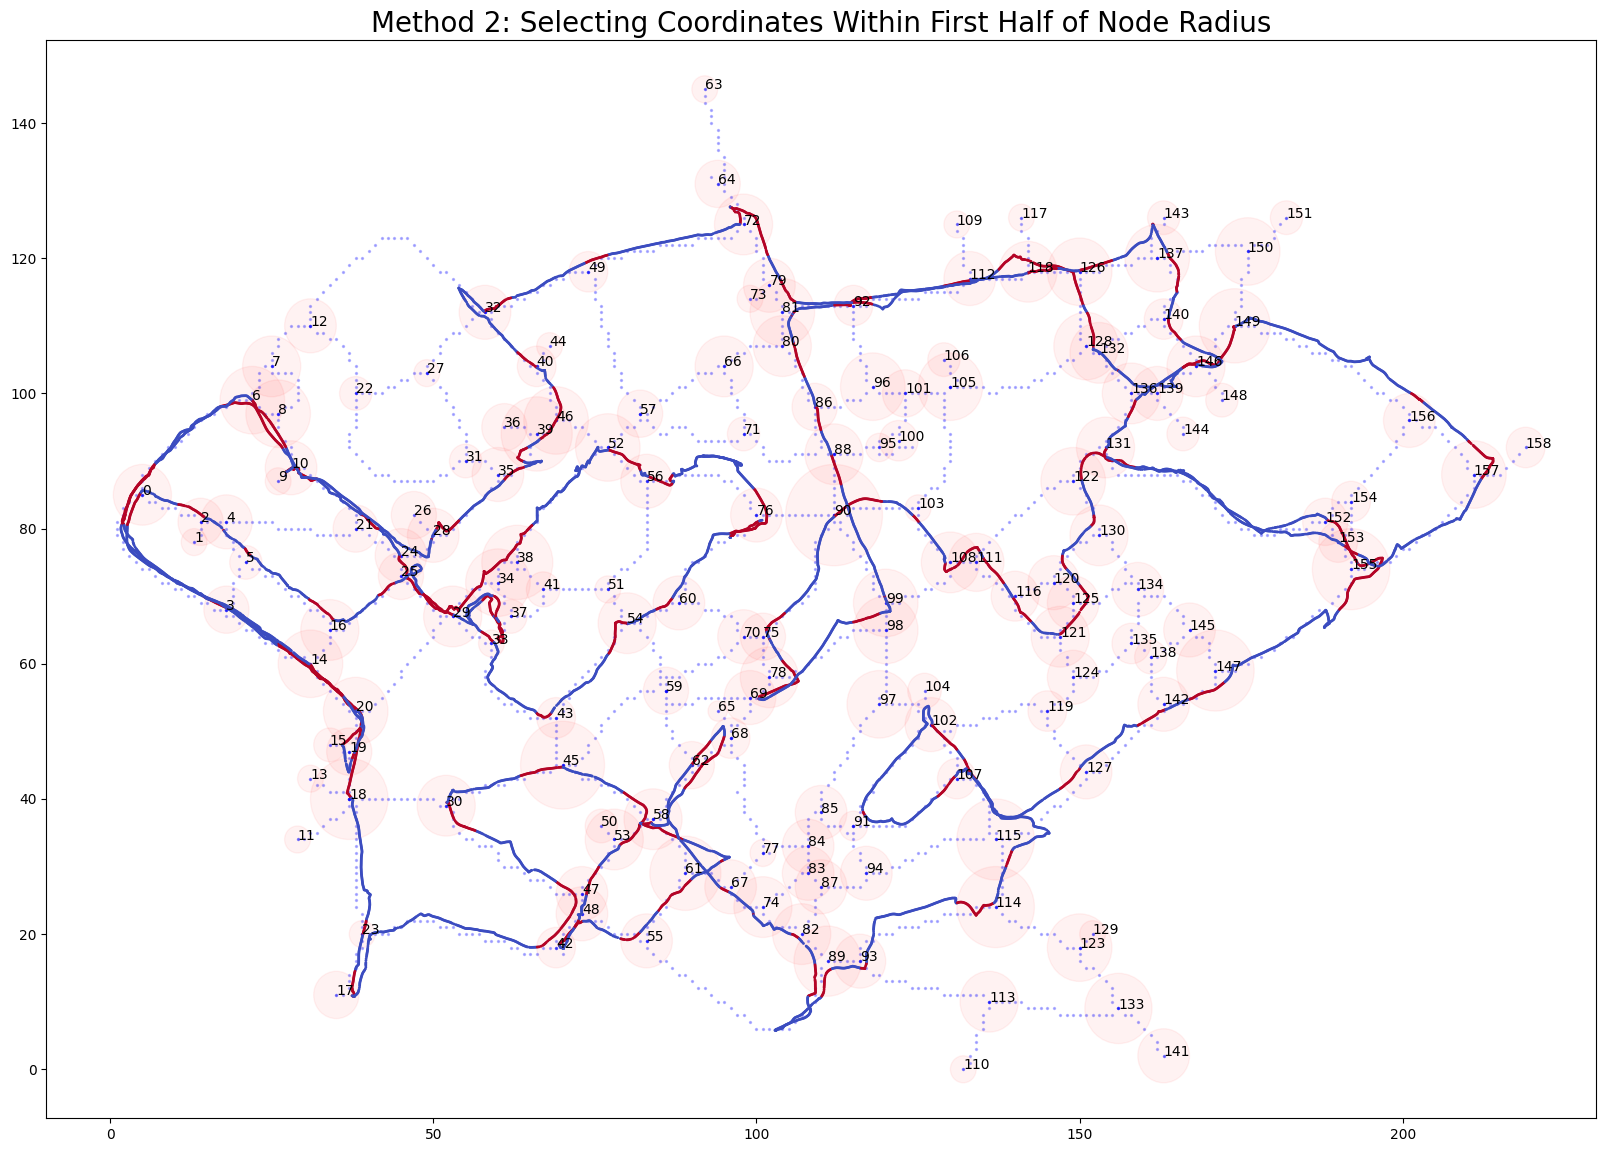

In [53]:
fig = plt.figure(figsize=(20,14))

# draw node radii and nr
for index, row in node_df.iterrows():
    radius = row['nodeRadius']
    x = row['nodeCentroid_x']
    z = row['nodeCentroid_z']
    node = row['nodeNr']
    plt.text(x , z, str(node), fontsize=10)
    c = plt.Circle(( x , z ),radius,color = 'red', alpha = 0.05)
    plt.gca().add_artist(c)
    #plt.plot(x, z, 'r.')

#coor_old
#plt.scatter(coordinates_old['x_conv'],coordinates_old['z_conv'], s = 0.2, alpha = 0.05, c = 'skyblue')
# Melissas data
plt.scatter(graph_df['X_Coor'],graph_df['Z_Coor'], s = 2, alpha = 0.25, c = 'blue')
# Scatter plot with different colors based on 'in_final_df'
plt.scatter(subject_df['x_conv'], subject_df['z_conv'], s=1, c=subject_df['node_1st_half'], cmap='coolwarm')

plt.title('Method 2: Selecting Coordinates Within First Half of Node Radius', fontsize = 20)
plt.show()
fig.savefig(output_path + '/plots/method2_sub%s.png' % subject_id)

# Method 3: Temporal Distance to Next Node

In [54]:

# Get the timestamps of rows that are selected as closest to node centroid
selected_timestamps = subject_df.loc[subject_df['closest_to_nodeCentroid'] == 1, 'timestamp'].values

def calc_time_diff(current_timestamp):
    #if a next and a previous node exists TODO: handle the other cases better than just nan
    if np.any(selected_timestamps < current_timestamp) and np.any(selected_timestamps > current_timestamp):
        #select the one from selected which was reached first
        next_selected = np.min(selected_timestamps[selected_timestamps > current_timestamp])
        previous_selected = np.max(selected_timestamps[selected_timestamps < current_timestamp])
        #calculate the difference
        diff = next_selected - current_timestamp
        norm_diff = (diff / (next_selected - previous_selected))
        return diff, norm_diff
    else:
        return np.nan, np.nan
    
#applies above function to each row in df and adds the return value to new column
subject_df[['time_diff', 'time_diff_normalized']] = subject_df.apply(lambda row: calc_time_diff(row['timestamp']), axis=1, result_type='expand')

#set value where closest_to_nodeCentroid = 1 to 1 for resetting (has weird value otherwise)
subject_df.loc[subject_df.closest_to_nodeCentroid == 1, 'time_diff_normalized'] = 0


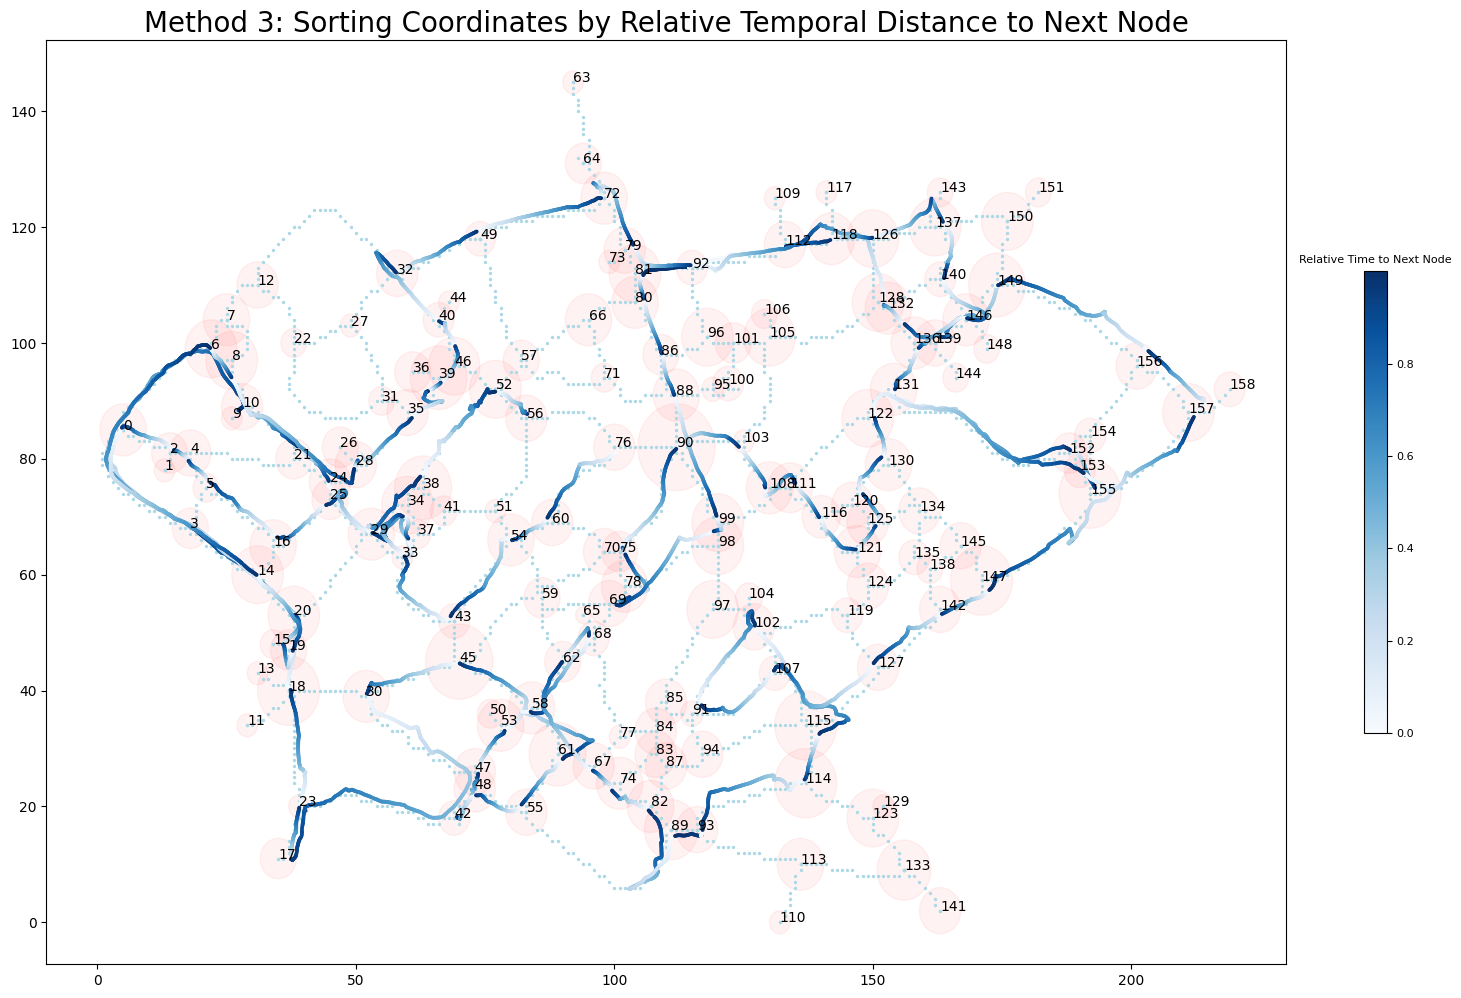

In [58]:
fig = plt.figure(figsize=(20,12))

# draw node radii and nr
for index, row in node_df.iterrows():
    radius = row['nodeRadius']
    x = row['nodeCentroid_x']
    z = row['nodeCentroid_z']
    node = row['nodeNr']
    plt.text(x , z, str(node), fontsize=10)
    c = plt.Circle(( x , z ),radius,color = 'red', alpha = 0.05)
    plt.gca().add_artist(c)
    #plt.plot(x, z, 'r.')



# Melissas data
plt.scatter(graph_df['X_Coor'],graph_df['Z_Coor'], s = 2, alpha = 1, c = 'lightblue')

#coor_old
#plt.scatter(coordinates_old['x_conv'],coordinates_old['z_conv'], s = 0.2, alpha = 0.03, c = 'skyblue')

# subject data with time until decision point as colormap
plt.scatter(subject_df['x_conv'], subject_df['z_conv'], s=3, c=subject_df['time_diff_normalized'], cmap='Blues')

clb=plt.colorbar(shrink=0.5)
clb.ax.tick_params(labelsize=8) 
clb.ax.set_title('Relative Time to Next Node',fontsize=8) # its actually the other way around

plt.title('Method 3: Sorting Coordinates by Relative Temporal Distance to Next Node', fontsize = 20)
plt.show()
fig.savefig(output_path + '/plots/method3_sub%s.png' % subject_id)

# Summary Statistics


In [60]:
total_nodes = subject_df['nodeNr'].nunique()
print("Number of nodes travelled:", total_nodes)

in_nodeRadius_props = subject_df['in_nodeRadius'].value_counts()
#print("Proportions of data selected in method 1:", in_nodeRadius_props)

node_1st_half_props = subject_df['node_1st_half'].value_counts()
#print("Proportions of data selected in method 2:",node_1st_half_props)

in_nodeRadius_props = subject_df['in_nodeRadius'].value_counts(normalize=True)
print("Proportions of data selected in method 1:")
print(in_nodeRadius_props * 100)  # Multiply by 100 for percentage representation
print()

node_1st_half_props = subject_df['node_1st_half'].value_counts(normalize=True)
print("Proportions of data selected in method 2:")
print(node_1st_half_props * 100)  # Multiply by 100 for percentage representation


#Proportion of data selected in smethod 3
segments = [(0, 0.2), (0.2, 0.4), (0.4, 0.6), (0.6, 0.8), (0.8, 1.0)]

for i, (start, end) in enumerate(segments, start=1):
    segment_df = subject_df[
        (subject_df['time_diff_normalized'] >= start) & 
        (subject_df['time_diff_normalized'] < end)
    ]
    proportion = len(segment_df) / len(subject_df)
    print(f"Proportion of data selected in segment {i}: {proportion:.2%}")


Number of nodes travelled: 106
Proportions of data selected in method 1:
in_nodeRadius
1    67.741445
0    32.258555
Name: proportion, dtype: float64

Proportions of data selected in method 2:
node_1st_half
0    64.851711
1    35.148289
Name: proportion, dtype: float64
Proportion of data selected in segment 1: 20.69%
Proportion of data selected in segment 2: 19.01%
Proportion of data selected in segment 3: 19.35%
Proportion of data selected in segment 4: 17.98%
Proportion of data selected in segment 5: 20.12%


# Save Results

In [61]:

subject_df_to_save = subject_df.rename(columns={'timestamp': 'latency'})
filepath = Path(output_path + '/Behavioural_decisions_sub%s.csv' % subject_id)  
filepath.parent.mkdir(parents=True, exist_ok=True)  
subject_df_to_save.to_csv(filepath, sep=",")  